# РК №1
## Милевич Артём Андреевич ИУ5-62Б (Вариант 13)

Задача №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

Данные: https://www.kaggle.com/mohansacharya/graduate-admissions (файл Admission_Predict.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy
import plotly
import missingno as msno
from numpy import nan 
import random
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

### Загрузим датасет и выведем информацию о нем.

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


### Подсчитаем количество пропусков по столбцам.

In [5]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### В датасете отсутствуют пропуски.
Добавим вручную по 5% пропусков в количественный и категориальный признак соответственно. В качестве количественного выберем столбец 'GRE Score', а в качестве категориального 'University Rating', который принимает значения в диапазоне [1, 5].

In [6]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [7]:
rnd_nums = random.sample(range(df.shape[0]), int(df.shape[0]*0.05))
for i in range (len(rnd_nums)):
    df.loc[df['Serial No.'] == rnd_nums[i], 'University Rating'] = nan

In [8]:
rnd_nums = random.sample(range(df.shape[0]), int(df.shape[0]*0.05))
for i in range (len(rnd_nums)):
    df.loc[df['Serial No.'] == rnd_nums[i], 'GRE Score'] = nan

In [9]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107,4.0,4.0,4.5,8.87,1,0.76
2,3,316.0,104,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103,2.0,2.0,3.0,8.21,0,0.65


In [10]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

Serial No. - 0.0%
GRE Score - 5.0%
TOEFL Score - 0.0%
University Rating - 5.0%
SOP - 0.0%
LOR  - 0.0%
CGPA - 0.0%
Research - 0.0%
Chance of Admit  - 0.0%


### Заполнение пропусков.
Если произвести удаление строк с пропусками, то в данном случае это приведёт к резкому сокращению датасета и последующему ухудшению качества модели. Поэтому проведём импьютацию, т.е. заполним пропуски некоторыми значениями.

Сначала возьмем столбец количественного признака и построим гистограмму распределения его значений.

<Axes: ylabel='Frequency'>

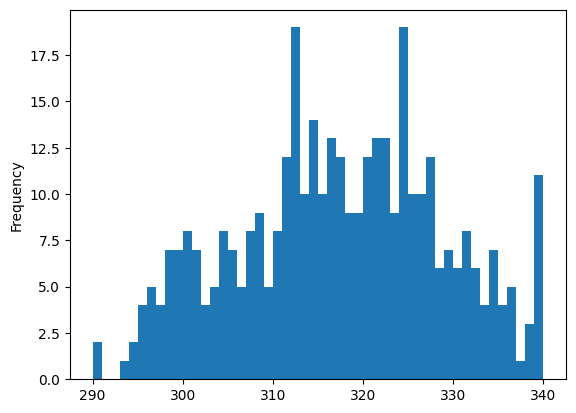

In [11]:
df['GRE Score'].plot.hist(bins=50)

Распределение значений походит на нормальное, но имеются очень большие выбросы. Было решено проводить импьютацию по медиане, так как она более устойчива к выбросам.

In [12]:
imputer = SimpleImputer(strategy='median', missing_values=nan)
imputer = imputer.fit(df[['GRE Score']])
df['GRE Score'] = imputer.transform(df[['GRE Score']])

Построим гистограмму для категориального признака.

<Axes: ylabel='Frequency'>

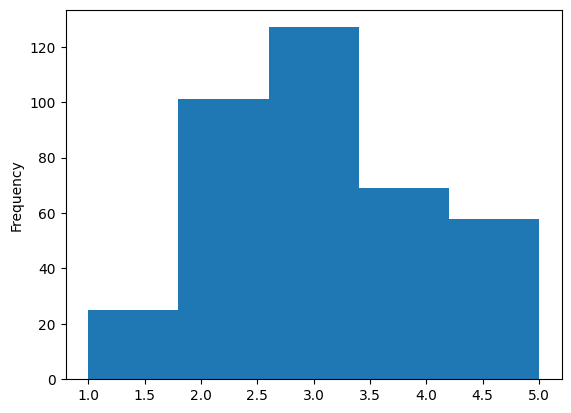

In [13]:
df['University Rating'].plot.hist(bins=5)

Если заполнить пропуски наиболее часто встречающимся (most frequent) значением, это сильно повлияет на распределение, что может испортить корреляцию датасета. Поэтому пропущенные значения заменим на отдельную константу "-1".

In [14]:
imputer = SimpleImputer(missing_values=nan, strategy='constant', fill_value=-1)
imputer = imputer.fit(df[['University Rating']])
df['University Rating'] = imputer.transform(df[['University Rating']])

In [15]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100, 2)))

Serial No. - 0.0%
GRE Score - 0.0%
TOEFL Score - 0.0%
University Rating - 0.0%
SOP - 0.0%
LOR  - 0.0%
CGPA - 0.0%
Research - 0.0%
Chance of Admit  - 0.0%


### Посмотрим на корреляционную матрицу после заполнения пропусков.

In [16]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.089861,-0.147932,-0.098897,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.089861,1.000000,0.823754,0.497761,0.601794,0.547997,0.819431,0.565966,0.790510
TOEFL Score,-0.147932,0.823754,1.000000,0.539678,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.098897,0.497761,0.539678,1.000000,0.551352,0.490969,0.578751,0.355673,0.549454
SOP,-0.166932,0.601794,0.657981,0.551352,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.547997,0.567721,0.490969,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.819431,0.828417,0.578751,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.565966,0.489858,0.355673,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.790510,0.791594,0.549454,0.675732,0.669889,0.873289,0.553202,1.000000


### Дальнейшее построение модели машинного обучения.
Для построения модели можно удалить столбец с серийным номером записи (Serial No.), поскольку его нахождение не имеет никакого смысла, т.к. jupyter сам задает столбец id (без названия). В качестве целевого признака наиболее логично выбрать последний столбец "Chance of Admit" (вероятность поступления в университет). Остальные столбцы имеют высокую корреляцию с целевым признаком (Chance of Admit) и их всего 7, поэтому они могут выступать в качестве объектов-признаков. В итоге все столбцы, кроме "Serial No.", будут использованы для дальнейшего построения модели.